<h1><center>E-news Express</center></h1>

## Background:

E-news Express is an online news portal striving to expand it's business by acquiring new subscribers.  The design team has created a new landing page to achieve this goal.  In an effort to determine whether the new landing page attracted more visitors who became subscribers, one hundred users have been randomly selected.  These users were divided into two equal groups: the control group-viewed the old landing page; treatment group - half viewed the new landing page. Other data was collected from each individual user and provided in the data file, 'abtest.csv'. 

## Objective:

To explore the dataset to extract insights from the data.  Also perform statistical analysis on the data set to determine if users spend  ore time on the new landing page than the old one.  Answer the following questions:  Did more users convert to subscribers after viewing the new landing page or the old landing page?  Is there a relationship between the new subscriber conversion and language preference? Is the average time spent on the new landing page similar for all language users?


## Data:

The data includes information for the 100 users randomly sampled including:

*user_id* - user ID of website visitor<br>
*group* - was user in control or treatment group<br>
*landing_page (lpage)* - was old or new landing page viewed<br>
*time_spent_on_the_page (time)* - amount of time in minutes user spent on landing page<br>
*converted (conv)* - denotes whether or not user became subscriber<br>
*language_preferred (langpref)* - language chosen by user on landing page<br>

In [182]:
#to remove warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Libraries including numpy, pandas, seaborn, scipy.stats and statistics

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statistics

### Read in Data set

In [184]:
# import data
ab=pd.read_csv('abtest.csv')

### Checking shape and information of data set

In [185]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [186]:
ab.shape

(100, 6)

Data has 100 rows and 6 columns

### Renaming columns for ease of use

In [267]:
#truncating column names while also creating an new idential data set to ensure the integrity of the original data,
#  column names were changed as follows:  'landing_page' changed to'lpage';'time_spent_on_the_page' changed to 'time';
# 'converted' changed to 'conv'; 'language_preferred' changed to 'langpref'
abt=ab.rename(columns={'landing_page':'lpage','time_spent_on_the_page':'time','converted':'conv',
                       'language_preferred':'langpref'}, inplace=False)

### Verifying new column names

In [188]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   100 non-null    int64  
 1   group     100 non-null    object 
 2   lpage     100 non-null    object 
 3   time      100 non-null    float64
 4   conv      100 non-null    object 
 5   langpref  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Reviewing top five records

In [189]:
#initial look at data
abt.head()

,user_id,group,lpage,time,conv,langpref
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


### Checking the summary of the data set

In [190]:
abt.describe()

,user_id,time
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


### Checking for missing values

In [191]:
abt.isnull().sum()

user_id     0
group       0
lpage       0
time        0
conv        0
langpref    0
dtype: int64

### Reviewing distinct values for all columns with Object Data type

In [192]:
#determine counts of distinct values for 'group' column
abt.group.value_counts()

treatment    50
control      50
Name: group, dtype: int64

In [193]:
#determine counts of distinct values for 'lpage' (landing_page)column
abt.lpage.value_counts()

old    50
new    50
Name: lpage, dtype: int64

In [194]:
#determine counts of distinct values for 'conv'(converted) column
abt.conv.value_counts()

yes    54
no     46
Name: conv, dtype: int64

In [195]:
#determine counts of distinct values for 'langpref' (language_preferred) column
abt.langpref.value_counts()

Spanish    34
French     34
English    32
Name: langpref, dtype: int64

## Exploratory Data Analysis

#### Time spent on old and new landing pages

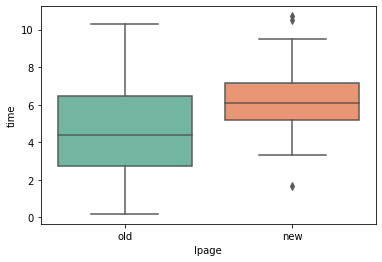

In [196]:
sns.boxplot(x='lpage', y='time', data=abt, palette='Set2');

#### Time spent on landing page and whether or not user converted to subscriber

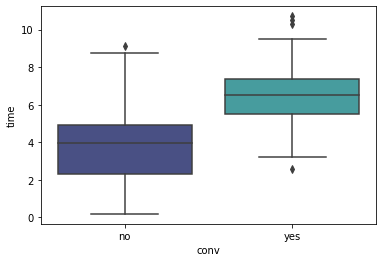

In [197]:
sns.boxplot(x='conv', y='time', data=abt, palette = "mako");

#### Time spent on either landing page sorted by converted subscribers

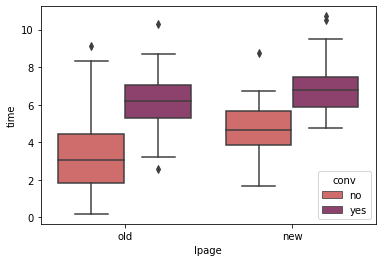

In [198]:
sns.boxplot(x='lpage', y='time', data=abt, hue='conv', palette='flare');

#### Time spent on either landing page, sorted by language preference

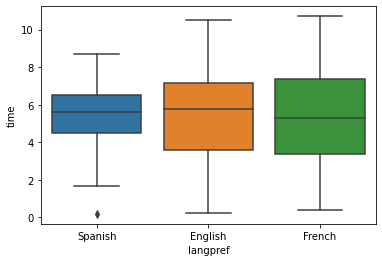

In [199]:
sns.boxplot(x='langpref', y='time', data=abt);

#### Time spent on old and new landing page, sorted by language preference

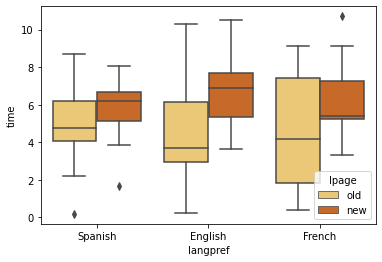

In [200]:
sns.boxplot(x='langpref', y='time', hue='lpage',data=abt, palette='YlOrBr');

#### Time spent on landing page by language preference and sorted by subscriber conversion

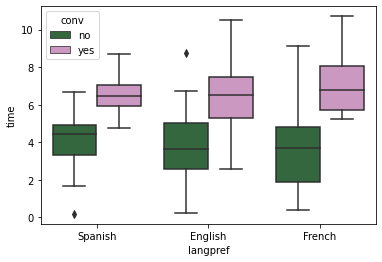

In [201]:
sns.boxplot(x='langpref', y='time', hue='conv',data=abt, palette='cubehelix');


Reviewing the above box plots suggests users tend to spend more time on the new landing page.  Also, those that spend more time on either landing page tend to become subscribers.  When comparing time spent on the old landing page and the new landing page in conjunction with the subscriber conversions, the number who didn't subscribe appear to have spent less time on the old landing page than the new, but the time spent by new subscribers appears to be similar with the average time spent on the new landing page slightly higher than the old landing page, disregarding outliers. 

In reference to language preference, it appears that French language speakers spent marginally more time than English speakers overall on either landing page, with Spanish speakers spending the least. The average time English speaking users spent on the new landing page appears higher than either French or Spanish speakers.  The average time spent on either landing page appears to be similar across languages in regards to those who converted to subscribers. 

## Statistical Analysis

### 1.   Do the users spend more time on the new landing page than the old landing page? 

#### Establish null and alternative hypotheses

Let $\mu_1$ and $\mu_2$ equal the average amount of time spent on old landing page and new landing page, respectively

Therefore:

 Null Hypothesis: 
 
 $H_0:\mu_1=\mu_2$

Alternative Hypothesis:

 $H_a:\mu_1<mu_2$

In [209]:
# sort data by landing page for further analysis
by_lp=abt.groupby('lpage') #sort landing page
old=by_lp.get_group('old')
new=by_lp.get_group('new')

In [210]:
#verify newly created 'old' dataset
old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 96
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   50 non-null     int64  
 1   group     50 non-null     object 
 2   lpage     50 non-null     object 
 3   time      50 non-null     float64
 4   conv      50 non-null     object 
 5   langpref  50 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.7+ KB


In [211]:
# verify newly created 'new' dataset
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 99
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   50 non-null     int64  
 1   group     50 non-null     object 
 2   lpage     50 non-null     object 
 3   time      50 non-null     float64
 4   conv      50 non-null     object 
 5   langpref  50 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.7+ KB


Assume both data sets are normally distributed using the Central Limit Theorem assupmtions.  These assumptions include: 
- the data is randomly sampled
- sample values are indendendent of each other
- samples are from same distribution and sample size is suffciently large ($\geq30$)

In [222]:
#determine if sample standard deviations are equal
print('The standard deviation of the time spent on the old landing page is', round(old.time.std(),2))
print('The standard deviation of the time spent on the new landing page is', round(new.time.std(),2))

The standard deviation of the time spent on the old landing page is 2.58
The standard deviation of the time spent on the new landing page is 1.82


Because the sample standard deviations are not equal, it is safe to assume the population standard deviations are not equal.  The Independent Sample T-test can be used to assess the null hypothesis, once remaining T-test assumptions are met.  These assumptions include:
- Continuous data - yes, time is measured on continuous scale
- Normally distributed population - yes in accordance with the Central Limit Theorem assumptions as stated previously
- Independent populations - two different test groups, one viewed old landing page, another viewed new landing page
- Unequal standard deviations - proved previously
- Random sampling from the population - background information states randomly sampled users

Because all these assumptions are met, the two sample T-test is used to assess the null hypothesis.  Level of significance is assumed to be .05.

In [224]:
#import necessary functions
from scipy.stats import ttest_ind
#find p-value
tstat,pval = ttest_ind(old['time'], new['time'], equal_var=False, alternative='less')
print('The p-value is', pval)

The p-value is 0.0001392381225166549


Because the p-value ( $\approx$ .0001) is less than the level of significance (.05), the null hypothesis is rejected.  Therefore, there is enough evidence to suggest that users spend more time on the new landing page than the old landing page. 

### 2.   Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

#### Establish Null and Alternative Hypotheses

Let $p_1$ and $p_2$ represent the conversion rates of the old landing page and new landing page, respectively.

Therefore:

Null Hypothesis:

$H_0:  p_1 = p_2$

Alternative Hypothesis:

 $H_a: p_1 < p_2$

#### Determine actual number of converted users on each landing page

In [226]:
#import necessary functions
from collections import Counter
print(Counter(old['conv']))

Counter({'no': 29, 'yes': 21})


In [227]:
print(Counter(new['conv']))

Counter({'yes': 33, 'no': 17})


Out of the 50 users viewing the old landing page, 21 converted to subscribers.  For the new landing page, which also had 50 users, 33 converted to subscribers. 

Test for satisfaction of Z-test assumptions:

- Binomially distributed population - yes, users were either converted to subscribers or they were not)
- Randomly sampled population - background information states randomly selected users
- Can the binomial distribution be approximated by a normal distribution - (np) and n(1-p) are greater than or equal to 10

>>$np_1 = 50\cdot \frac{21}{50} = 21 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-21}{50} = 29 \geq 10 \\
np_2 = 50\cdot \frac{33}{50} = 33 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-33}{50} = 17 \geq 10 $

Because these assumptions are met, the two proportions Z-test is used to assess the null hypothesis.  Assume level of significance to be .05


In [268]:
#import necessary functions
from statsmodels.stats.proportion import proportions_ztest

In [269]:
#set the counts of converted users
conv_us = np.array([21,33])
#set sample sizes
pages = np.array([50,50])

In [270]:
#find p-value
tstat1, pval1=proportions_ztest(conv_us, pages, alternative = 'smaller')
print('P-value = ', pval1)

P-value =  0.008026308204056278


Because the p-value ( $\approx$ .008) is less than the level of significance (.05) the null hypothesis can be rejected.  Therefore there is enough evidence to suggest that conversion rate related to the old landing page is less than the conversion rate for the new landing page. 

### 3.   Does the converted status depend on the preferred language? 

In [238]:
#create a contingency table with conversions in relation to language preference
tab=pd.crosstab(abt.conv, abt.langpref)
tab

langpref,English,French,Spanish
conv,,,
no,11,19,16
yes,21,15,18


#### Establish Null and Alternative Hypotheses

$H_0$: Converted status is independent of language preference

$H_a$: Converted status is dependent on language preference

Test for satisfaction of Chi-Squared Test for Independence:

- Categorical variables - yes
- Number of sample observations in each level at least 5 - yes (see contingency table)
- Randomly sampled population - background information states randomly selected users

Because these assumptions are met, Chi-Squared Test for Independence can be used.  Assumed level of significance is .05.

In [258]:
#reset index so that 'conv' is a column and not the index
tab.reset_index(level=0, inplace=True)
tab

langpref,conv,English,French,Spanish
0,no,11,19,16
1,yes,21,15,18


In [261]:
#import required function
from scipy.stats import chi2_contingency

#find p-value
chi, pval2, dof, expect = stats.chi2_contingency(tab.drop('conv', axis=1))
print('p-value = ', pval2)

p-value =  0.21298887487543447


Because the p-value ($\approx$ .213) is greater than the Level of Significance (.05), the null hypothesis cannot be rejected.  Therefore there is enough evidence to suggest that a user's converted status is independent of language preference. 

### 4. Is the mean time spent on the new page the same for the different language users?

#### Establish Null and Alternative Hypotheses

Let $\mu_1$, $\mu_2$ and $\mu_3$ represent the mean time spent on the new page for each English, French, and Spansh language preference

Null Hypothesis:

$H_0:  \mu_1=\mu_2=\mu_3$

Alternative Hypothesis:

$H_a$ :  At least one preferred language users' average time spent on the new landing page is different from the other two

The One-way ANOVA Test is most likely the best statistical test to test the hypothesis.  However, it is necessary to verify assumptions are met using the Shapiro-Wilks test for normality and the Levene test for equality of variances.  Level of significance is assumed to be .05 for both tests. 

##### Shapiro-Wilks test

Establish Null and Alternative Hypotheses

Null Hypothesis:

$H_0$ :  Time spent on the new landing page follows a normal distribution

Alternative Hypothesis:

$H_a$ : Time spent on the new landing page does not follow a normal distribution

In [263]:
# find the p-value
w, pval3 = stats.shapiro(new['time'])
print('p-value =', pval3)

p-value = 0.8040016293525696


Because the p-value is very large ($\approx$ .80) the null hypothesis can not be rejected.  Therefore there is enough evidence to suggest that the sample is normally distributed.

##### Levene's Test

Establish Null and Alternative Hypotheses

Null Hypothesis:

$H_0$ : All population variances are equal

Alternative Hypothesis:

$H_a$ : At least one variance is different from the rest

In [264]:
#import required function
from scipy.stats import levene
#find p-value
stats, pval4 = levene(new['time'][new['langpref']=='English'], 
                      new['time'][new['langpref']=='French'], 
                      new['time'][new['langpref']=='Spanish'])
print('p-value =', pval4)

p-value = 0.46711357711340173


Because the p-value is fairly large ($\approx$ .47) the null hypothesis cannot be rejected.  Therefore there is enough evidence to suggest all population variances are equal.

##### Summarize satisfaction of assumptions

- Populations are normally distributed as confirmed with the Shapiro-Wilks test
- Samples are independent simple randome samples - background information verifies random sampling
- Equal population variances - Levene's test results concur with homogeneity of variances 

Because these assumptions are met, the One-way ANOVA Test can be used to determine if the mean time spent on the new page varies based on language preference.

##### One-way ANOVA test

In [265]:
#import required function
from scipy.stats import f_oneway

#find p-value
tstat5, pval5 = f_oneway(new.loc[new['langpref']=='English', 'time'],
                         new.loc[new['langpref']=='French','time'],
                         new.loc[new['langpref']=='Spanish','time'])
print('p-value = ', pval5)

p-value =  0.43204138694325955


The p-value ( $\approx$ .43) is significantly greater than the level of significance.  Therefore the null hypothesis cannot be rejected.  This suggests that the mean time spent on the new page is similar across all three language preference users.  